## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8320 - acc: 0.3423 - val_loss: 1.6982 - val_acc: 0.3940
Epoch 2/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5960 - acc: 0.4318 - val_loss: 1.6115 - val_acc: 0.4209
Epoch 3/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5099 - acc: 0.4665 - val_loss: 1.4923 - val_acc: 0.4726
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4435 - acc: 0.4880 - val_loss: 1.5254 - val_acc: 0.4543
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.3989 - acc: 0.4999 - val_loss: 1.5292 - val_acc: 0.4575
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3655 - acc: 0.5142 - val_loss: 1.4132 - val_acc: 0.4933
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.3243 - acc: 0.5307 - val_loss: 1.4459 - val_acc

Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.0185 - acc: 0.2948 - val_loss: 1.9942 - val_acc: 0.3019
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9722 - acc: 0.3127 - val_loss: 1.9538 - val_acc: 0.3167
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.9351 - acc: 0.3258 - val_loss: 1.9222 - val_acc: 0.3291
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9052 - acc: 0.3363 - val_loss: 1.8944 - val_acc: 0.3465
Epoch 8/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8799 - acc: 0.3446 - val_loss: 1.8717 - val_acc: 0.3515
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8588 - acc: 0.3511 - val_loss: 1.8520 - val_acc: 0.3634
Epoch 10/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8400 - acc: 0.3590 - val_loss: 1.8354 - val_acc: 0.3649
Epoch 11/50
50000/50000 [===============

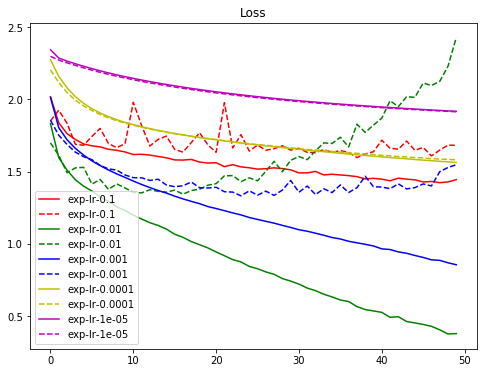

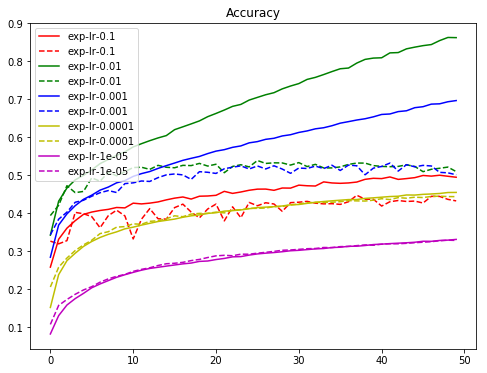

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現